In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd
data=pd.read_csv("DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv",sep=";")
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [7]:
data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'distribustion ')

<Figure size 1500x1000 with 0 Axes>

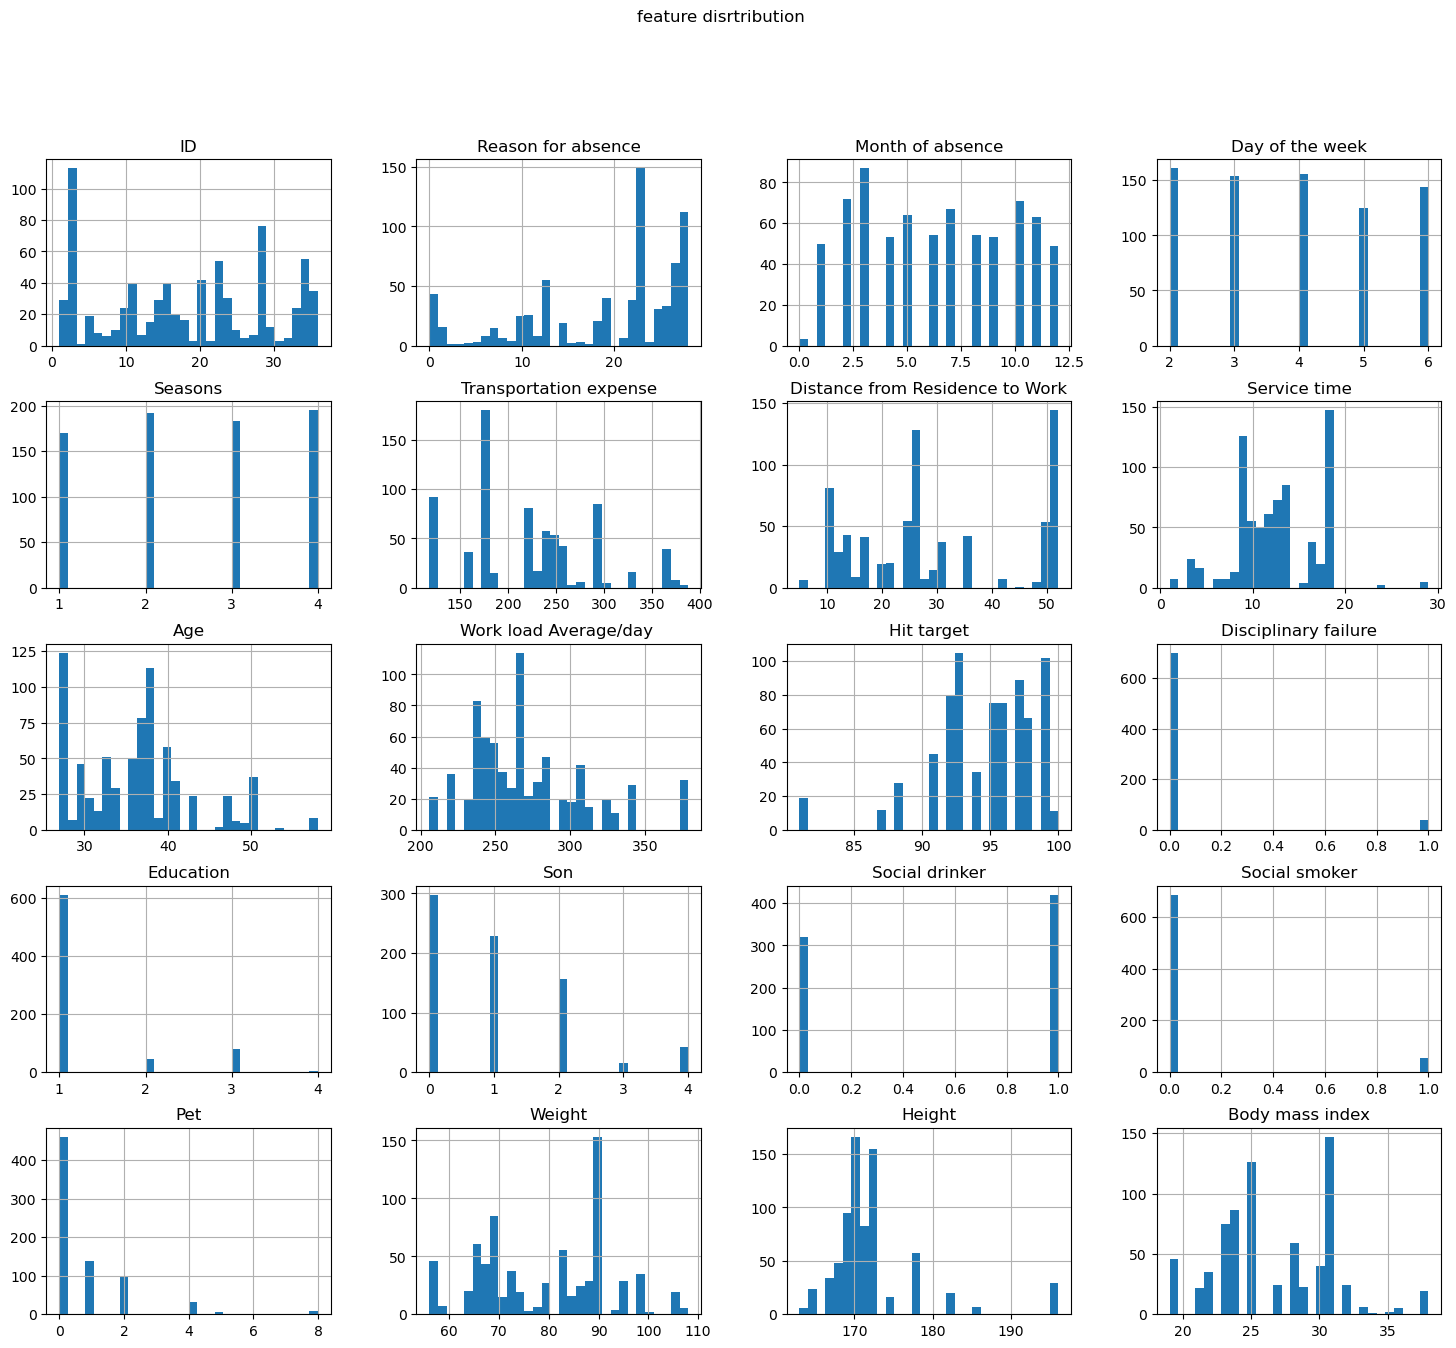

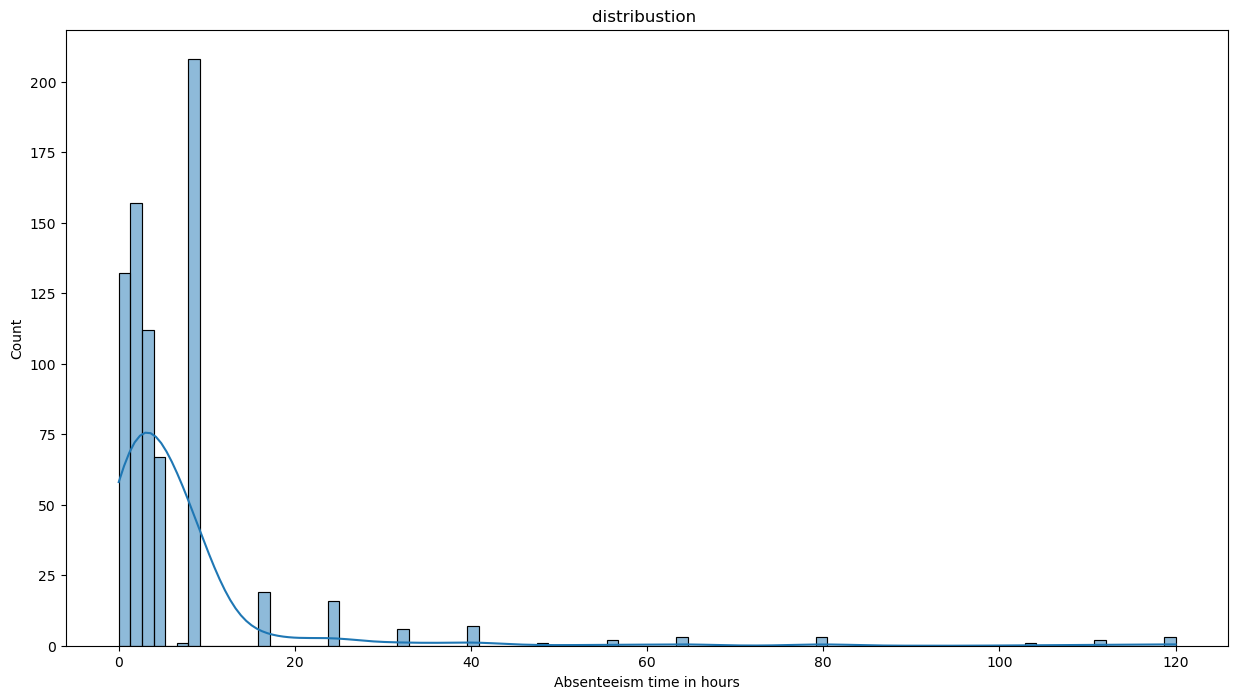

In [8]:
plt.figure(figsize=(15,10))
data.drop("Absenteeism time in hours",axis=1).hist(bins=30,figsize=(18,15))
plt.suptitle("feature disrtribution")

plt.figure(figsize=(15,8))
sns.histplot(data["Absenteeism time in hours"],kde=True)
plt.title("distribustion ")

In [ ]:
#descriptive analye
age_group=data.groupby("Age")["Absenteeism time in hours"].agg(["mean","median","count"])
Education_group=data.groupby("Education")["Absenteeism time in hours"].agg(["mean","median","count"])
Disciplinary_group=data.groupby("Disciplinary failure")["Absenteeism time in hours"].agg(["mean","median","count"])
Reason_for_absence_group=data.groupby("Reason for absence")["Absenteeism time in hours"].agg(["mean","median","count"])
print("age_group:",age_group)
print("Education_group:",Education_group)
print("Disciplinary_group:",Disciplinary_group)
print("Reason_for_absence_group:",Reason_for_absence_group)

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x="Age",y="mean",data=age_group)
plt.title("age_group")
plt.ylabel("mean Absenteeism time in hours")

plt.subplot(2,2,2)
sns.barplot(x="Education",y="mean",data=Education_group)
plt.title("Education_group")
plt.ylabel("mean Absenteeism time in hours")

plt.subplot(2,2,3)
sns.barplot(x="Disciplinary failure",y="mean",data=Disciplinary_group)
plt.title("Disciplinary_group")
plt.ylabel("mean Absenteeism time in hours")

plt.show()

In [ ]:
"""Analyzing Reasons for Absenteeism

What are the most frequent reasons for employee absence? Are there any pattern in these reasons?

Perform descriptive analysis to find the answer to the above question"""

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="Reason for absence",y="count",data=Reason_for_absence_group)
plt.title("Reason_for_absence_group")
plt.ylabel("count")

In [ ]:
# Group by age and reason for absence to find patterns
age_reason_pattern = data.groupby(['Age', 'Reason for absence']).size().reset_index(name='Count')

# Display the age-reason absenteeism patterns
print(age_reason_pattern)

# Visualize patterns between age and reasons for absence
plt.figure(figsize=(12, 6))
sns.barplot(x='Reason for absence', y='Count', hue='Age', data=age_reason_pattern, palette='viridis')
plt.title('Reasons for Absenteeism by Age Group')
plt.xlabel('Reason for Absence')
plt.ylabel('Count of Absences')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()


In [ ]:
# Group by age and reason for absence to find patterns
Education_reason_pattern = data.groupby(['Education', 'Reason for absence']).size().reset_index(name='Count')

# Display the age-reason absenteeism patterns
print(Education_reason_pattern)

# Visualize patterns between age and reasons for absence
plt.figure(figsize=(12, 6))
sns.barplot(x='Reason for absence', y='Count', hue='Education', data=Education_reason_pattern, palette='viridis')
plt.title('Reasons for Absenteeism by Education Group')
plt.xlabel('Reason for Absence')
plt.ylabel('Count of Absences')
plt.xticks(rotation=45)
plt.legend(title='Education Group')
plt.show()


In [ ]:
data["Age"].value_counts()

In [ ]:
"""task - 4: Predicting Absenteeism Duration

Can we predict the duration of an employee's absence based on factors like reason for absence, disciplinary failure distance from residence to work, obesity, etc.?

Perform predictive analysis to forecast the duration of an employee's absence based on various factors mentioned above."""
from sklearn.model_selection import train_test_split


In [17]:
feature_data=data[['Height','Son','Age','Social drinker','Transportation expense','Hit target','Work load Average/day ','Month of absence','Service time','Weight']]
target_data=data['Absenteeism time in hours']
X=feature_data
y=target_data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [20]:
#model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [22]:
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=MSE**0.5
R2=r2_score(y_test,y_pred)
print("MSE:",MSE)
print("MAE:",MAE)
print("RMSE:",RMSE)
print("R2:",R2)

MSE: 178.50801914240273
MAE: 6.6943522347004984
RMSE: 13.360689321378697
R2: -0.4428978598444455


In [23]:
feature_data2=data[['Reason for absence', 'Disciplinary failure', 'Distance from Residence to Work', 'Body mass index', 'Service time', 'Age']]
target_data2=data['Absenteeism time in hours']
X2=feature_data2
y2=target_data

In [24]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.2,random_state=0)

In [25]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model.fit(X_train2, y_train2)

# Make predictions
y_pred2 = model.predict(X_test2)

In [26]:
MSE=mean_squared_error(y_test2,y_pred2)
MAE=mean_absolute_error(y_test2,y_pred2)
RMSE=MSE**0.5
R2=r2_score(y_test2,y_pred2)
print("MSE:",MSE)
print("MAE:",MAE)
print("RMSE:",RMSE)
print("R2:",R2)

MSE: 156.91469302526653
MAE: 5.877118918709971
RMSE: 12.526559504719025
R2: -0.2683568829683094


In [ ]:
####################################################PROJECT_2

In [30]:
# Create a binary target variable for high absenteeism and Assuming "high absenteeism" as Absenteeism time > median (we'll use the median to classify "high" absenteeism)

# Calculate the median absenteeism time
median_absenteeism = data['Absenteeism time in hours' ].median()

# Create a binary column: 1 if absenteeism time > median, else 0
data['High Absenteeism'] = (data['Absenteeism time in hours'] > median_absenteeism).astype(int)

# Drop unnecessary columns, Removing ID (identifier) and Absenteeism time in hours (since we now have 'High Absenteeism')
data_cleaned = data.drop(['ID', 'Absenteeism time in hours'], axis=1)

data_cleaned.head()


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,High Absenteeism
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,1
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,0
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,1
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

X = data_cleaned.drop('High Absenteeism', axis=1)
y = data_cleaned['High Absenteeism']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

logreg.fit(X_train_scaled, y_train)

knn.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluating models
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

logreg_report = classification_report(y_test, y_pred_logreg)
knn_report = classification_report(y_test, y_pred_knn)

logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
knn_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])

logreg_accuracy, knn_accuracy, logreg_report, knn_report, logreg_roc_auc, knn_roc_auc


(0.7094594594594594,
 0.722972972972973,
 '              precision    recall  f1-score   support\n\n           0       0.75      0.69      0.72        80\n           1       0.67      0.74      0.70        68\n\n    accuracy                           0.71       148\n   macro avg       0.71      0.71      0.71       148\nweighted avg       0.71      0.71      0.71       148\n',
 '              precision    recall  f1-score   support\n\n           0       0.73      0.78      0.75        80\n           1       0.71      0.66      0.69        68\n\n    accuracy                           0.72       148\n   macro avg       0.72      0.72      0.72       148\nweighted avg       0.72      0.72      0.72       148\n',
 0.8041360294117648,
 0.7495404411764706)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

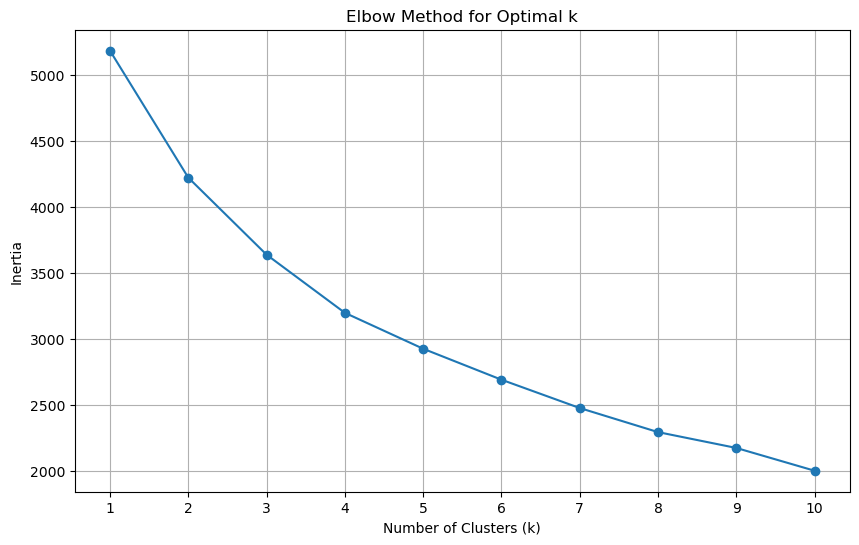

In [32]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

#  relevant features for clustering
# We'll use: 'Reason for absence', 'Month of absence', 'Absenteeism time in hours', 'Service time', 'Transportation expense'
features_for_clustering = data[['Reason for absence', 'Service time', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Work load Average/day ', 'High Absenteeism']]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Use the Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)  # Testing for 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()


In [33]:
optimal_k = 4

# Fit the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Analyze the clusters
cluster_analysis = data.groupby('Cluster').mean()  # Mean of features in each cluster
print(cluster_analysis)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


                ID  Reason for absence  Month of absence  Day of the week  \
Cluster                                                                     
0        16.505102           16.653061          6.877551         3.903061   
1        21.000000           16.517857          6.361607         3.790179   
2        24.430052           22.435233          6.093264         3.984456   
3         5.346457           23.039370          5.755906         4.047244   

          Seasons  Transportation expense  Distance from Residence to Work  \
Cluster                                                                      
0        2.545918              285.096939                        35.770408   
1        2.504464              201.129464                        17.897321   
2        2.658031              201.243523                        23.077720   
3        2.440945              189.070866                        50.811024   

         Service time        Age  Work load Average/day   ...  Educa

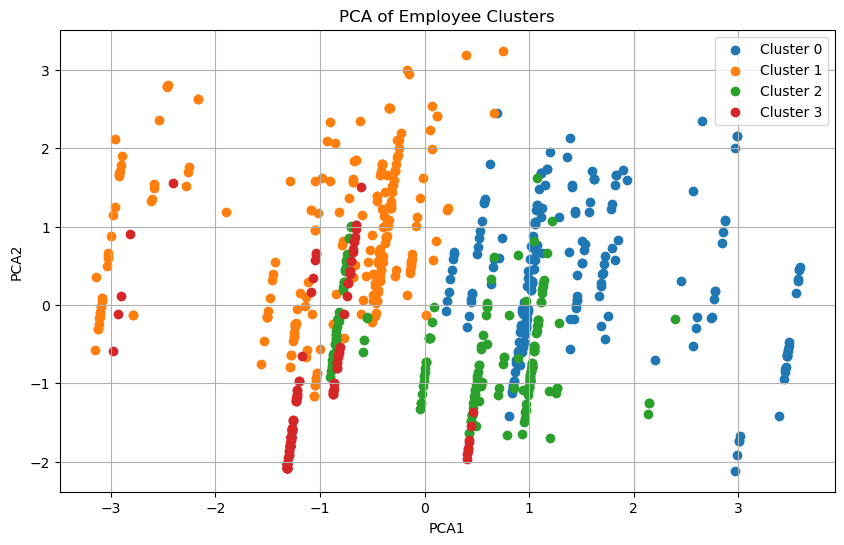

In [34]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']

# Plotting the PCA components colored by cluster
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(pca_df[pca_df['Cluster'] == cluster]['PCA1'],
                pca_df[pca_df['Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')
plt.title('PCA of Employee Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()
plt.show()


In [36]:
# Assuming 'Churn' is a binary column indicating employee churn (1 for churned, 0 for active)
churn_analysis = data.groupby('Cluster')['Churn'].mean()  # Average churn rate per cluster
print(churn_analysis)

# Visualize churn rates by cluster
churn_analysis.plot(kind='bar', figsize=(10, 6), title='Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.grid()
plt.show()


KeyError: 'Column not found: Churn'